In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:

df_diab = pd.read_csv("/Users/tylerhaims/Documents/GitHub/Diabetes/Diabetes2021/diabetes_binary_health_indicators_BRFSS2021.csv")
print(len(df_diab['BMI']))
labels = df_diab['Diabetes_binary']


236378


[[ 1.21843555e-01  4.48302131e-02  3.37243878e-02  4.49863219e-03
   4.59204042e-01  9.78982100e-03  6.85438768e-03  1.72087930e-02
  -2.14200913e-02 -4.85845834e-03 -6.06867729e-03 -4.81431899e-03
   1.83334665e-03  1.13581218e-03  1.00171678e-01  9.93749509e-02
   4.60723649e-01  2.63996168e-02  6.03026326e-03  2.15751127e-01
  -3.37862113e-02 -1.25594594e-01]
 [ 4.48302131e-02  2.43368297e-01  6.85220887e-02  9.21574464e-03
   6.91551384e-01  2.41768533e-02  1.20754363e-02  2.81843497e-02
  -2.70607095e-02 -7.54785671e-03 -6.70813990e-03 -4.07589049e-04
   4.66621651e-03 -9.01107195e-04  1.42944488e-01  4.56891070e-02
   5.73356172e-01  3.70791551e-02  1.66474877e-02  5.51549062e-01
  -4.96376574e-02 -1.76121796e-01]
 [ 3.37243878e-02  6.85220887e-02  2.40408659e-01  9.08059057e-03
   2.80098309e-01  1.98861984e-02  8.14827032e-03  2.35288058e-02
  -1.55875128e-02 -5.80525586e-03 -5.91156147e-03 -1.68892020e-03
   5.25863189e-03 -1.47403140e-03  9.44109909e-02  7.67626410e-02
   4.2

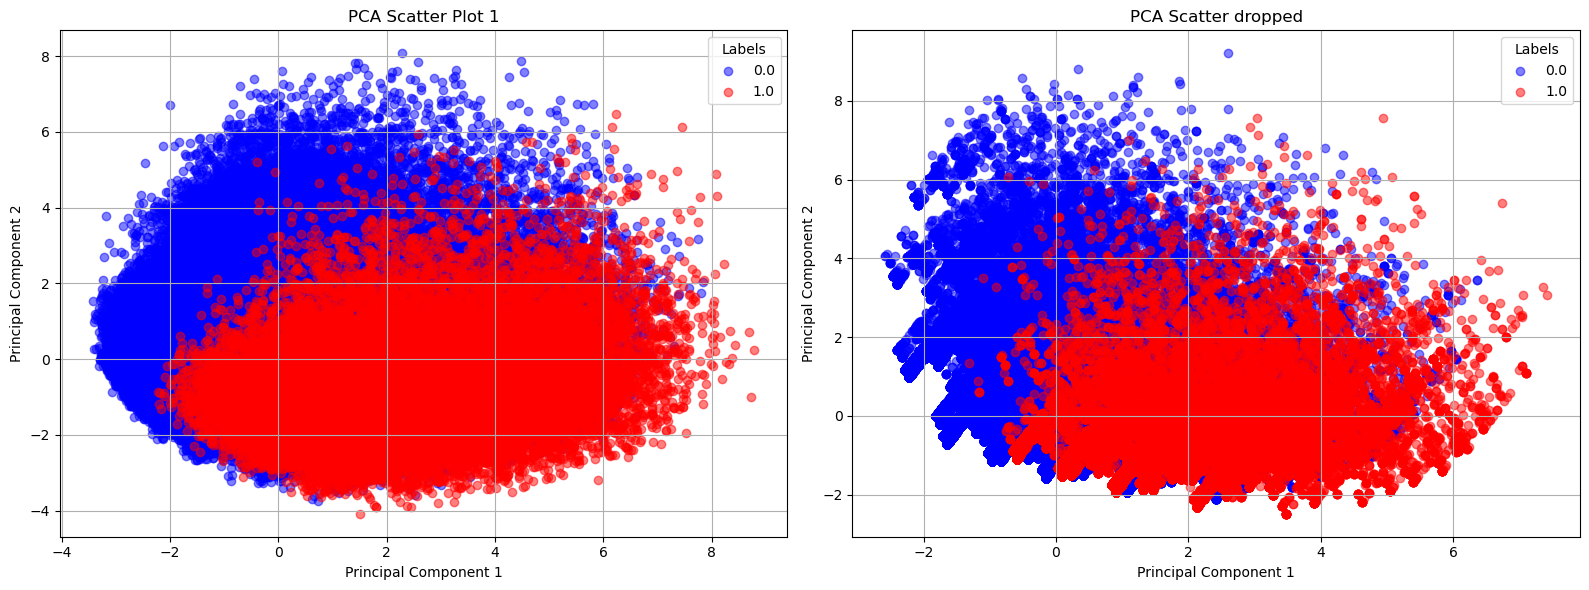

PC1 LAODINGS FOR DF WITHOUT DROPPED DATA
                Variable  Loading_PC3  Abs_Loading_PC3
14               GenHlth     0.396563         0.396563
17              DiffWalk     0.349795         0.349795
16              PhysHlth     0.327217         0.327217
21                Income    -0.304114         0.304114
8           PhysActivity    -0.264444         0.264444
1                 HighBP     0.263422         0.263422
0        Diabetes_binary     0.245617         0.245617
20             Education    -0.229386         0.229386
7   HeartDiseaseorAttack     0.217687         0.217687
19                   Age     0.195363         0.195363
2               HighChol     0.191029         0.191029
4                    BMI     0.188786         0.188786
15              MentHlth     0.169502         0.169502
6                 Stroke     0.160227         0.160227
5                 Smoker     0.159832         0.159832
10               Veggies    -0.107687         0.107687
13           NoDocbcCost

In [4]:
covariance_matrix = np.cov(df_diab, rowvar=False)
print(covariance_matrix)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_diab)
scaled_data
pca = PCA(n_components=2)  # Specify the number of components you want to keep
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

covariance_matrix = np.cov(pca_data, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix of PCA-transformed data:")
print(covariance_matrix)

explained_variance_ = pca.explained_variance_

print("Explained variance ratio for each principal component:")
for i, ratio in enumerate(explained_variance_):
    print(f"PC{i+1}: {ratio:.4f}")

df_diab_noscale = df_diab.drop(columns=['BMI','GenHlth', 'PhysHlth', 'Age', 'Education','Income'])

scaled_data2 = scaler.fit_transform(df_diab_noscale)
scaled_data2
pca2 = PCA(n_components=2)  # Specify the number of components you want to keep
pca2.fit(scaled_data2)
pca_data2 = pca2.transform(scaled_data2)
pca_df2 = pd.DataFrame(data=pca_data2, columns=['PC1', 'PC2'])
unique_labels = np.unique(labels)

colors = ['b', 'r']  # Define colors for each label, you can extend this for more labels

# plt.figure(figsize=(8, 6))
# for label, color in zip(unique_labels, colors):
#     mask = (labels == label)
#     plt.scatter(pca_data[mask, 0], pca_data[mask, 1], c=color, label=label, alpha=0.5)

# plt.title('PCA Scatter Plot with Labels')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Labels')
# plt.grid(True)
# plt.show()
# Create a figure with two subplots side by side

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the first scatter plot on the first subplot
for label, color in zip(unique_labels, colors):
    mask = (labels == label)
    axes[0].scatter(pca_data[mask, 0], pca_data[mask, 1], c=color, label=label, alpha=0.5)

axes[0].set_title('PCA Scatter Plot 1')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='Labels')
axes[0].grid(True)

# Plot the second scatter plot on the second subplot
for label, color in zip(unique_labels, colors):
    mask = (labels == label)
    axes[1].scatter(pca_data2[mask, 0], pca_data2[mask, 1], c=color, label=label, alpha=0.5)

axes[1].set_title('PCA Scatter dropped')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend(title='Labels')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
loadings_pc3 = pca.components_[0]
loadings_pc4 = pca.components_[1]

print('PC1 LAODINGS FOR DF WITHOUT DROPPED DATA')
loadings_df3 = pd.DataFrame({'Variable': df_diab.columns, 'Loading_PC3': loadings_pc3})

# Sort the DataFrame by the absolute value of the loadings to see which variables are most strongly correlated with PC1
loadings_df3['Abs_Loading_PC3'] = abs(loadings_df3['Loading_PC3'])
loadings_df_sorted3 = loadings_df3.sort_values(by='Abs_Loading_PC3', ascending=False)

print(loadings_df_sorted3)

print('PC2 LAODINGS FOR DF WITHOUT DROPPED DATA')
loadings_df4 = pd.DataFrame({'Variable': df_diab.columns, 'Loading_PC4': loadings_pc4})

# Sort the DataFrame by the absolute value of the loadings to see which variables are most strongly correlated with PC1
loadings_df4['Abs_Loading_PC4'] = abs(loadings_df4['Loading_PC4'])
loadings_df_sorted4 = loadings_df4.sort_values(by='Abs_Loading_PC4', ascending=False)

print(loadings_df_sorted4)

print("------------------------------------")
print("------------------------------------")


loadings_pc5 = pca2.components_[0]
loadings_pc6 = pca2.components_[1]

print('PC1 LAODINGS FOR DF  DROPPED DATA')
loadings_df5 = pd.DataFrame({'Variable': df_diab_noscale.columns, 'Loading_PC5': loadings_pc5})

# Sort the DataFrame by the absolute value of the loadings to see which variables are most strongly correlated with PC1
loadings_df5['Abs_Loading_PC5'] = abs(loadings_df5['Loading_PC5'])
loadings_df_sorted5 = loadings_df5.sort_values(by='Abs_Loading_PC5', ascending=False)

print(loadings_df_sorted5)

print('PC2 LAODINGS FOR DF  DROPPED DATA')
loadings_df6 = pd.DataFrame({'Variable': df_diab_noscale.columns, 'Loading_PC6': loadings_pc6})

# Sort the DataFrame by the absolute value of the loadings to see which variables are most strongly correlated with PC1
loadings_df6['Abs_Loading_PC6'] = abs(loadings_df6['Loading_PC6'])
loadings_df_sorted6 = loadings_df6.sort_values(by='Abs_Loading_PC6', ascending=False)

print(loadings_df_sorted6)


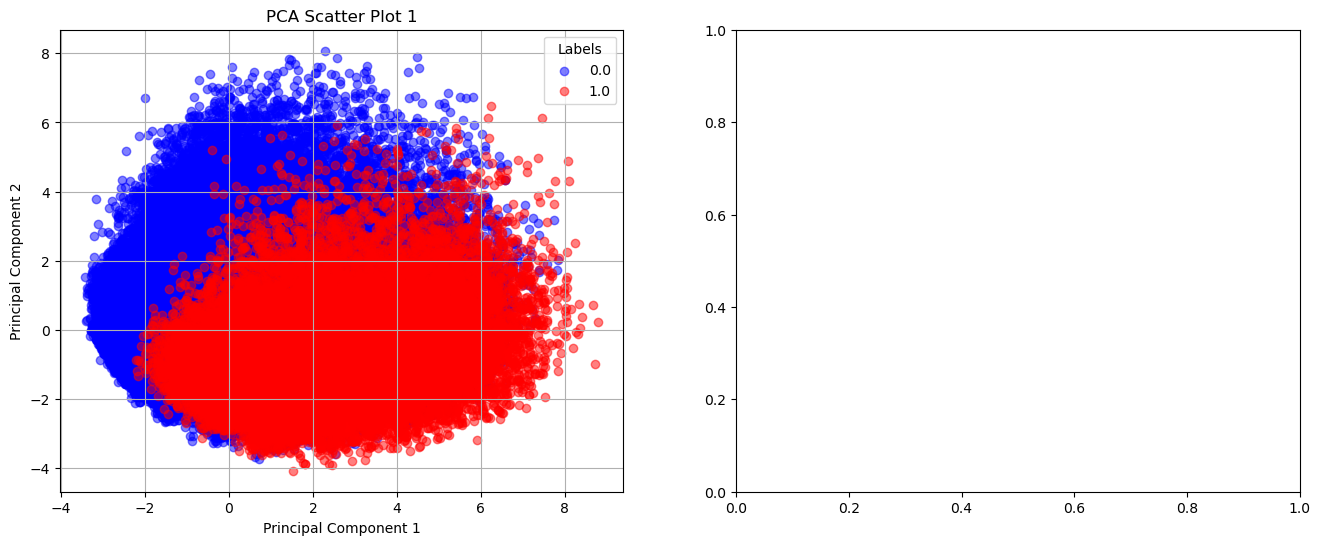

In [5]:
columns_to_add = ['PhysActivity', 'Income', 'PhysHlth', 'DiffWalk', 'GenHlth', 'HighBP']
relevant_df = df_diab[columns_to_add]
scaled_data3 = scaler.fit_transform(df_diab)
pca.fit(scaled_data3)
pca_data3 = pca.transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data3, columns=['PC1', 'PC2'])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the first scatter plot on the first subplot
for label, color in zip(unique_labels, colors):
    mask = (labels == label)
    axes[0].scatter(pca_data3[mask, 0], pca_data3[mask, 1], c=color, label=label, alpha=0.5)

axes[0].set_title('PCA Scatter Plot 1')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='Labels')
axes[0].grid(True)


Accuracy: 0.851108384804129
Recall: 0.10091194498430259


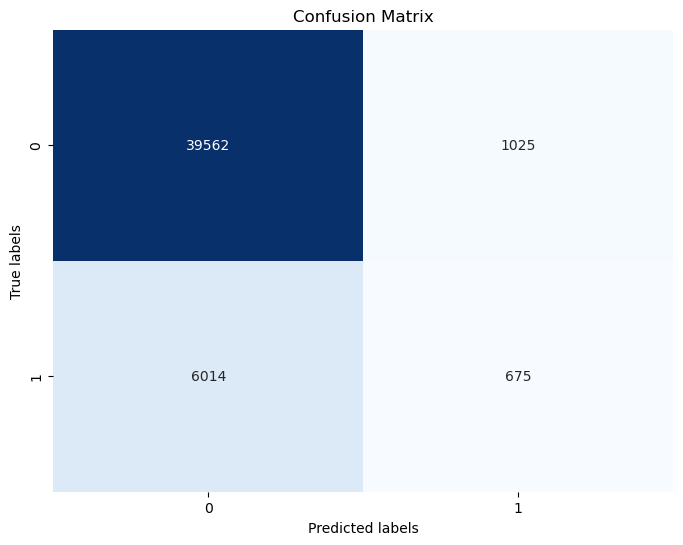

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import recall_score



# Assuming df_diab is your DataFrame and 'Diabetes_binary' is the target column

# Split the data into features (X) and target (y)
X = df_diab.drop('Diabetes_binary', axis=1)  # Features
y = df_diab['Diabetes_binary']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=4,metric = 'manhattan')  # You can adjust the number of neighbors (K) as needed

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8684744902275996
Recall: 0.2830019434893108


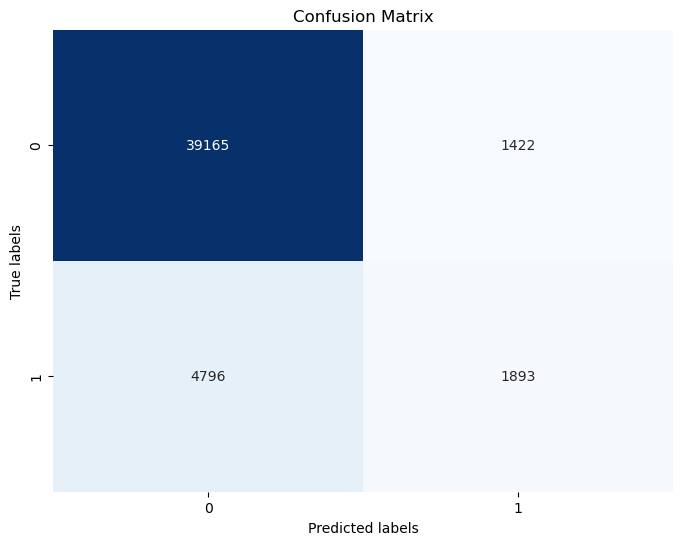

In [11]:
X = pca_data  # Features
y = df_diab['Diabetes_binary']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=4, metric='chebyshev')  # You can adjust the number of neighbors (K) as needed

# Train the classifier on the training data

knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Split the data into features (X) and target (y)
X = df_diab.drop('Diabetes_binary', axis=1)  # Features
y = df_diab['Diabetes_binary']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=4, metric= 'minkowski')  # You can adjust the number of neighbors (K) as needed

# Train the classifier on the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()